<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

![picture](https://spn-sta.spinny.com/blog/20220228140350/Used-cars-Spinny-Blog.jpg?dpr=1.0&q=70&compress=true&quality=80&w=1200)

The Used cars or Second-hand cars market has been at a rise in recent decade. People want good cars, branded cars or luxury cars depending on their purpose but owning a new car is not easy. There are some drawbacks of buying a new car like huge waiting periods, unsure of the performance and problems with individual unit, costing of maintenance etc. In recent years we have seen that a maintained car can be used even after 2 or say 5 years and it runs smoothly.
   New drivers also prefer mastering the driving skills on a second hand car so that the risk of a bigger loss while driving can be minimised. Even for a person who wanted to seel his car because of certain reasons like relocation, cash needs, or any other reasons, finding the buyer was very difficult and so was getting the right price.
We are seeing firms which have specialised in the purchase and sell of used cars and are seeing a significant increase in customers. One of the biggest challenges of these firms is to determine the right price of the used car which could depend on a lot of factors. In this Project, we would look into some basic insights from the data and also try to create a prediction model for a used car.

---
<a name = Section2></a>
# **2. Problem Statement**
---





  - In the past few years, prices of new cars have skyrocketed, due to which most people are incapable of buying a new one.

  - Customers buying a new car always looks for assurity of their money to be worthy.

  - There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features.

  - Even though there are websites that offers this service, their prediction method may not be the best.

  - Besides, different models and systems may contribute on predicting power for a used car’s actual market value.

  - It is important to know their actual market value while both buying and selling.
  






---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

### **Upgrading Libraries**


In [ ]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

In [ ]:
!pip install ydata_profiling

### **Importing Libraries**




In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from ydata_profiling import ProfileReport as pp                         # Import Pandas Profiling (To generate Univariate Analysis)
#import pandas_profiling as pp
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name|
|02| model         | Available car different Variants|  
|03| year          | purchasing Year|
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [ ]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data.shape)
data.head()

Data Shape: (9576, 10)


car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

### **Data Description**



In [ ]:
data.describe()

price      mileage         engV         year
count    9576.000000  9576.000000  9142.000000  9576.000000
mean    15633.317316   138.862364     2.646344  2006.605994
std     24106.523436    98.629754     5.927699     7.067924
min         0.000000     0.000000     0.100000  1953.000000
25%      4999.000000    70.000000     1.600000  2004.000000
50%      9200.000000   128.000000     2.000000  2008.000000
75%     16700.000000   194.000000     2.500000  2012.000000
max    547800.000000   999.000000    99.990000  2016.000000

### **Data Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---


In [ ]:
pp(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data we need to verify and manipulate the integrity of the data by:
  - Handling missing data

  - Handling redundant/duplicate data

  - Handling inconsistent data

  - Handling outliers

  - Handling typos

In [ ]:
# Handling Missing Data
# 1. Remove Records where Price is 0 , as these may be erroneous entries
data=data[data.price !=0]

In [ ]:
# 2. Remove Records where mileage is 0, as these entries would be erroneous or else these cars are not worth predicting the price
data=data[data.mileage!=0]

In [ ]:
# 3. Dropping duplicate Records, as in ProfileReport, there are 88 duplicate records which need to be dropped
data.drop_duplicates()

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[8940 rows x 10 columns]

In [ ]:
#Checking the above Steps
data.query("price==0")
data.query("mileage == 0")
# In both cases no records were returned
data.duplicated().value_counts()


False    8940
True       66
Name: count, dtype: int64

In [ ]:
data.drop_duplicates(subset=None, keep='first', inplace = True) # The drop duplicates only removed all the duplicates when inplace was set to True

In [ ]:
# Handling the missing values in engV field
data['engV'].isna().value_counts()

engV
False    8534
True      406
Name: count, dtype: int64

In [ ]:
#We found that there are 406 missing values in engV, we will impute the mean of engV in these cells
engV_mean=data['engV'].mean()
engV_mean # Here we have found the mean of engV and stored it in engV_mean variable

data['engV']=data['engV'].fillna(engV_mean)
#All the missing values in engV are now replaced with the mean

In [ ]:
#Checking for missing values in drive field
data['drive'].isna().value_counts()
data['drive'].nunique()
#Here we will replace the missing values with "Other", as we are not sure what the drive type is
data['drive']=data['drive'].fillna('Other')

In [ ]:
#We would also like to calculate an Age Column from the Year Column, as Age of the used car could be an important independent variable in the prediction of the car price
data['age']=pd.Timestamp('now').year - data['year']


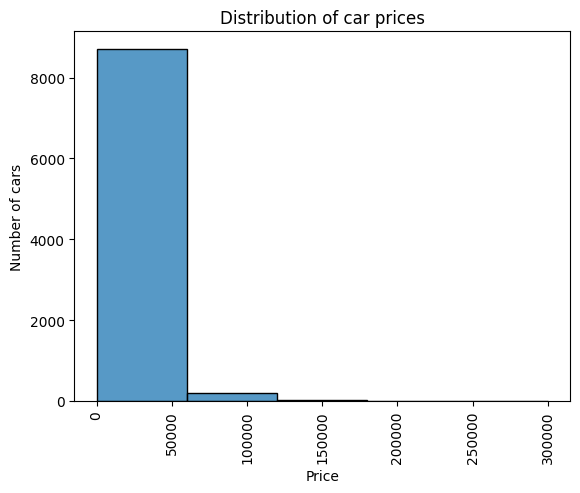

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['price'], bins=5)
plt.xlabel('Price')
plt.ylabel('Number of cars')
plt.title('Distribution of car prices')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#creating a column reg_num from registration, where yes means 1 and no means 0

data['reg_num'] = data['registration'].apply(lambda x: 1 if x == 'yes' else 0)


In [ ]:
#Creating a new numeric column reg_num from registration where yes is considered as 1 and no is considered as 0, this will help us later in the model building

data['reg_num'].value_counts()
data['registration'].value_counts()


registration
yes    8386
no      554
Name: count, dtype: int64

In [ ]:
# In this section we will check for typos in various columns
#Car
sorted(data['car'].unique())

['Acura',
 'Alfa Romeo',
 'Aro',
 'Aston Martin',
 'Audi',
 'BMW',
 'BYD',
 'Barkas',
 'Bentley',
 'Bogdan',
 'Buick',
 'Cadillac',
 'Changan',
 'Chery',
 'Chevrolet',
 'Chrysler',
 'Citroen',
 'Dacia',
 'Dadi',
 'Daewoo',
 'Daihatsu',
 'Dodge',
 'FAW',
 'Ferrari',
 'Fiat',
 'Ford',
 'GAZ',
 'GMC',
 'Geely',
 'Great Wall',
 'Groz',
 'Hafei',
 'Honda',
 'Huanghai',
 'Hummer',
 'Hyundai',
 'Infiniti',
 'Isuzu',
 'JAC',
 'Jaguar',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Lancia',
 'Land Rover',
 'Lexus',
 'Lifan',
 'Lincoln',
 'MG',
 'MINI',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Moskvich-AZLK',
 'Moskvich-Izh',
 'Nissan',
 'Opel',
 'Other-Retro',
 'Peugeot',
 'Porsche',
 'Renault',
 'Rolls-Royce',
 'Rover',
 'SMA',
 'Saab',
 'Samand',
 'Samsung',
 'Seat',
 'Skoda',
 'Smart',
 'SsangYong',
 'Subaru',
 'Suzuki',
 'TATA',
 'Tesla',
 'Toyota',
 'UAZ',
 'VAZ',
 'Volkswagen',
 'Volvo',
 'Wartburg',
 'ZAZ',
 'ZX',
 'ËUAZ']

In [ ]:
#Body
sorted(data['body'].unique())

['crossover', 'hatch', 'other', 'sedan', 'vagon', 'van']

In [ ]:
#Engine Type
sorted(data['engType'].unique())


['Diesel', 'Gas', 'Other', 'Petrol']

In [ ]:
#Model
sorted(data['model'].unique())

['1 Series',
 '1.3',
 '10',
 '100',
 '106',
 '107',
 '11',
 '1102 Òàâðèÿ',
 '1103 Ñëàâóòà',
 '110557',
 '1117',
 '1118',
 '1119',
 '116',
 '118',
 '120',
 '125',
 '1301',
 '1302',
 '147',
 '156',
 '159',
 '19',
 '190',
 '2',
 '200',
 '2008',
 '205',
 '206',
 '207',
 '208',
 '21',
 '210',
 '2101',
 '2102',
 '2103',
 '2104',
 '2105',
 '2106',
 '2107',
 '2108',
 '2109',
 '21093',
 '21099',
 '2110',
 '2111',
 '2112',
 '2113',
 '2114',
 '2115',
 '2117',
 '2121',
 '2123',
 '2140',
 '2141',
 '2170',
 '2171',
 '2172',
 '220',
 '230',
 '24',
 '240',
 '2410',
 '25',
 '250',
 '2705 GAZåëü',
 '2715',
 '2717',
 '2752 Ñîáîëü',
 '3',
 '300',
 '300 C',
 '300 M',
 '3008',
 '301',
 '306',
 '307',
 '308',
 '31029',
 '3110',
 '31105',
 '3151',
 '31512',
 '31514',
 '316',
 '3163',
 '318',
 '320',
 '3221 GAZåëü',
 '32213',
 '323',
 '324',
 '325',
 '328',
 '33',
 '330',
 '3302 GAZåëü',
 '3303',
 '335',
 '340',
 '350',
 '350Z',
 '3741',
 '3962',
 '4 Series Gran Coupe',
 '401',
 '403',
 '405',
 '406',
 '407',


In [ ]:
data['test']=data['model']

In [ ]:
pattern = ['Ê','ë','à','ñ','ñ','è','å','ñ','ê','è','å','ð','ó','ç','ï','ð','è','ÿ','Í','î','Ï', 'Ï','ò','ò','Ò','â','â','ã']
data['test'] = data['test'].replace(pattern,'',regex=True)

In [ ]:
sorted(data['test'].unique())

['',
 '-',
 '1 Series',
 '1.3',
 '10',
 '100',
 '106',
 '107',
 '11',
 '1102 ',
 '1103 Ñ',
 '110557',
 '1117',
 '1118',
 '1119',
 '116',
 '118',
 '120',
 '125',
 '1301',
 '1302',
 '147',
 '156',
 '159',
 '19',
 '190',
 '2',
 '200',
 '2008',
 '205',
 '206',
 '207',
 '208',
 '21',
 '210',
 '2101',
 '2102',
 '2103',
 '2104',
 '2105',
 '2106',
 '2107',
 '2108',
 '2109',
 '21093',
 '21099',
 '2110',
 '2111',
 '2112',
 '2113',
 '2114',
 '2115',
 '2117',
 '2121',
 '2123',
 '2140',
 '2141',
 '2170',
 '2171',
 '2172',
 '220',
 '230',
 '24',
 '240',
 '2410',
 '25',
 '250',
 '2705 GAZü',
 '2715',
 '2717',
 '2752 Ñáü',
 '3',
 '300',
 '300 C',
 '300 M',
 '3008',
 '301',
 '306',
 '307',
 '308',
 '31029',
 '3110',
 '31105',
 '3151',
 '31512',
 '31514',
 '316',
 '3163',
 '318',
 '320',
 '3221 GAZü',
 '32213',
 '323',
 '324',
 '325',
 '328',
 '33',
 '330',
 '3302 GAZü',
 '3303',
 '335',
 '340',
 '350',
 '350Z',
 '3741',
 '3962',
 '4 Series Gran Coupe',
 '401',
 '403',
 '405',
 '406',
 '407',
 '412',
 '

In [ ]:
data['test'].isna().value_counts() # We have removed all the values where there were garbage values in the strings

test
False    8940
Name: count, dtype: int64

In [ ]:
data.shape

(8940, 13)

In [ ]:
data['model']=data['test']

In [ ]:
data['model'].unique()

array(['Kuga', 'E-Class', 'CL 550', 'B 180', 'X-Trail', 'Accord',
       'Megane', '316', '750', 'M5', 'X5', 'Leaf', 'Passat B6', 'A6',
       'Sebring', 'XF', 'Sprinter 324 .', '5 Series', '520', 'Outlander',
       'Galant', 'Cayenne', 'Sportage', 'Passat B5', 'GLE-Class', 'Q7',
       'Outlander XL', 'Land Cruiser 200', 'Vito .', 'Camry', 'Touareg',
       '530', 'Accent', 'T5 (Transporter) .', 'Land Cruiser Prado',
       'Vectra C', 'Q5', '318', 'Lacetti', 'Superb', 'Range Rover Sport',
       'Passat B7', 'Lancer X', 'Range Rover Evoque', 'T5 (Transporter) ',
       'Lanos', 'Qashqai', 'Pajero Wagon', 'Octavia A5', 'Range Rover',
       '3', '6', 'LX 570', '740', 'GS 300', 'A5', 'C-Class', 'Tucson',
       'Octavia A7', 'S 350', 'Panamera', 'FX 37', 'GX', 'CL 55 AMG',
       'IQ', 'A4', 'Forester', 'Ceed', 'Polo', '2121', 'Civic', 'Aveo',
       'Lancer', 'Murano', 'Focus', 'Sorento', 'Astra G', '147', 'ML 500',
       'Fortwo', 'Duster', 'Santa FE', '2114', 'Caddy .', 'S 320',
 

In [ ]:
data.drop('test',axis=1)

car    price       body  mileage      engV engType  \
0              Ford  15500.0  crossover       68  2.500000     Gas   
1     Mercedes-Benz  20500.0      sedan      173  1.800000     Gas   
2     Mercedes-Benz  35000.0      other      135  5.500000  Petrol   
3     Mercedes-Benz  17800.0        van      162  1.800000  Diesel   
4     Mercedes-Benz  33000.0      vagon       91  2.622685   Other   
...             ...      ...        ...      ...       ...     ...   
9571        Hyundai  14500.0  crossover      140  2.000000     Gas   
9572     Volkswagen   2200.0      vagon      150  1.600000  Petrol   
9573  Mercedes-Benz  18500.0  crossover      180  3.500000  Petrol   
9574          Lexus  16999.0      sedan      150  3.500000     Gas   
9575           Audi  22500.0      other       71  3.600000  Petrol   

     registration  year      model  drive  age  reg_num  
0             yes  2010       Kuga   full   14        1  
1             yes  2011    E-Class   rear   13        1  
2             yes  2008     CL 550   rear   16        1  
3             yes  2012      B 180  front   12        1  
4             yes  2013    E-Class  Other   11        1  
...           ...   ...        ...    ...  ...      ...  
9571          yes  2011     Tucson  front   13        1  
9572          yes  1986  Passat B2  front   38        1  
9573          yes  2008     ML 350   full   16        1  
9574          yes  2008     ES 350  front   16        1  
9575          yes  2007         Q7   full   17        1  

[8940 rows x 12 columns]

In [ ]:
data.isna().value_counts() # We make sure to check that there are no missing values in our data

car    price  body   mileage  engV   engType  registration  year   model  drive  age    reg_num  test 
False  False  False  False    False  False    False         False  False  False  False  False    False    8940
Name: count, dtype: int64

In [ ]:
# Till the above all the Redundant values, duplicate rows, missing, data, typos, have been handled
data=data.drop('test',axis=1) #here we removed the dummy column test as the values have been incorporated in model

In [ ]:
data.columns #validating the the test column has been removed from the data
data.head()

car    price       body  mileage      engV engType registration  \
0           Ford  15500.0  crossover       68  2.500000     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173  1.800000     Gas          yes   
2  Mercedes-Benz  35000.0      other      135  5.500000  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162  1.800000  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91  2.622685   Other          yes   

   year    model  drive  age  reg_num  
0  2010     Kuga   full   14        1  
1  2011  E-Class   rear   13        1  
2  2008   CL 550   rear   16        1  
3  2012    B 180  front   12        1  
4  2013  E-Class  Other   11        1

In [ ]:
# Remove outliers in Price column
q1 = data['price'].quantile(0.02)
q3 = data['price'].quantile(0.98)
data['price'] = np.clip(data['price'], q1, q3)


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [ ]:
pp(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- Based on the data we will try to find insights



#Analysis Part 1 : Basic Insights
 In the part 1 of analysis we will generate simple insights, and try to answer certain questions

Question 1 : Which are the top 5 cars for sales based on counts

In [ ]:
carcounts = data.groupby('car')['car'].count().sort_values(ascending=False).reset_index(name='count')
carcounts.head()

car  count
0     Volkswagen    874
1  Mercedes-Benz    782
2            BMW    644
3         Toyota    499
4            VAZ    476

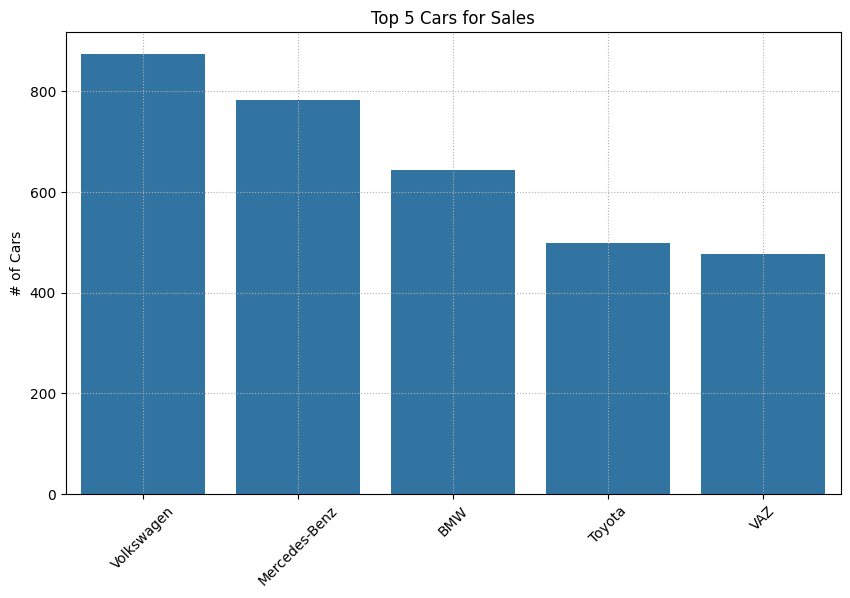

In [ ]:

top_5_cars = carcounts.head()
plt.figure(figsize=(10, 6))
sns.barplot(x='car', y='count', data=top_5_cars)
plt.xlabel(None)
plt.ylabel('# of Cars')
plt.title('Top 5 Cars for Sales')
plt.xticks(rotation=45)
plt.grid(linestyle = ':')
plt.show()


Question 2 : Show Top 5 cars by average price

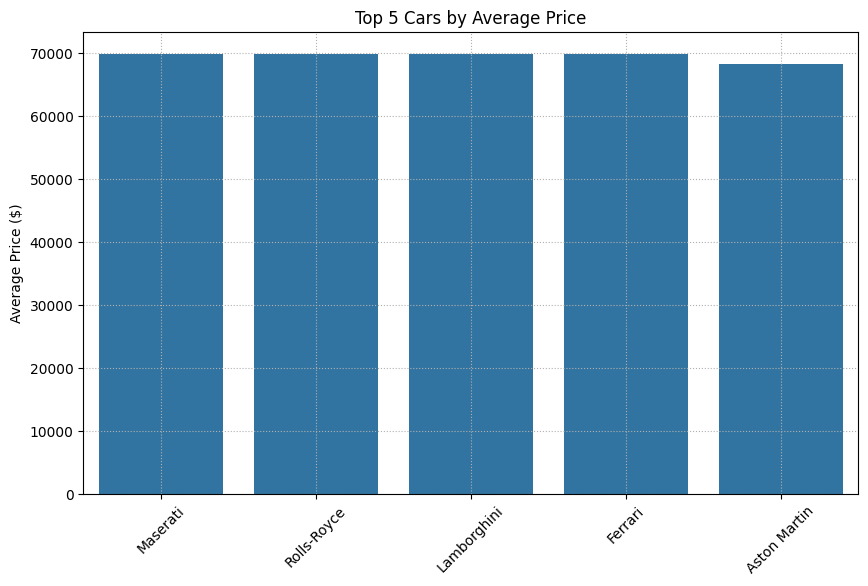

In [ ]:
average_price = data.groupby('car')['price'].mean().sort_values(ascending=False).reset_index(name='avg_price')
top_5_cars_by_avg_price = average_price.head()
plt.figure(figsize=(10, 6))
sns.barplot(x='car', y='avg_price', data=top_5_cars_by_avg_price)
plt.xlabel(None)
plt.ylabel('Average Price ($)')
plt.title('Top 5 Cars by Average Price')
plt.xticks(rotation=45)
plt.grid(linestyle = ':')
plt.show()


Question 3 : What is the number of cars for each Engine Type?

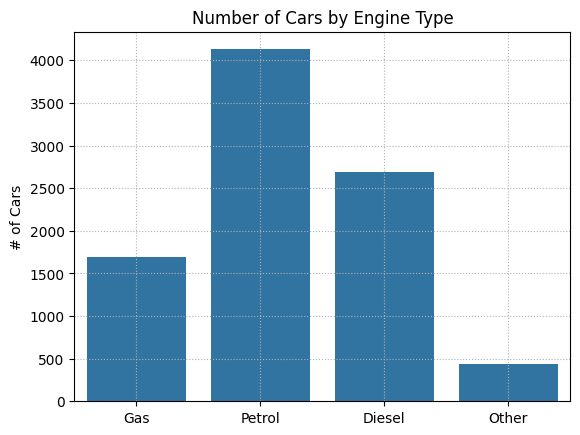

In [ ]:
sns.countplot(x="engType", data=data)
plt.xlabel(None)
plt.ylabel("# of Cars")
plt.title("Number of Cars by Engine Type")
plt.xticks(rotation=0)
plt.grid(linestyle=":")
plt.show()


Question 4 : Top 5 Body Types by counts

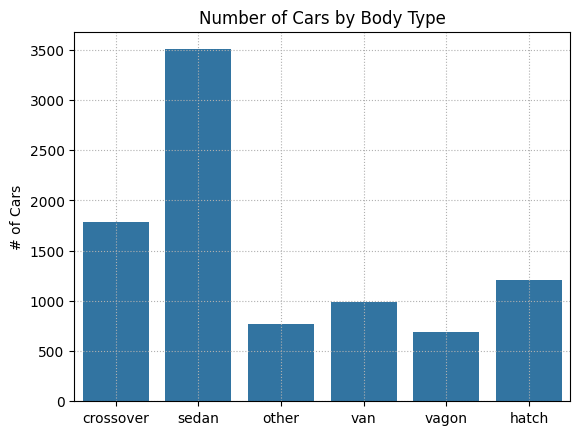

In [ ]:
sns.countplot(x="body", data=data)
plt.xlabel(None)
plt.ylabel("# of Cars")
plt.title("Number of Cars by Body Type")
plt.xticks(rotation=0)
plt.grid(linestyle=":")
plt.show()

Question 5 : Which are the top 5 body types by Average Price?





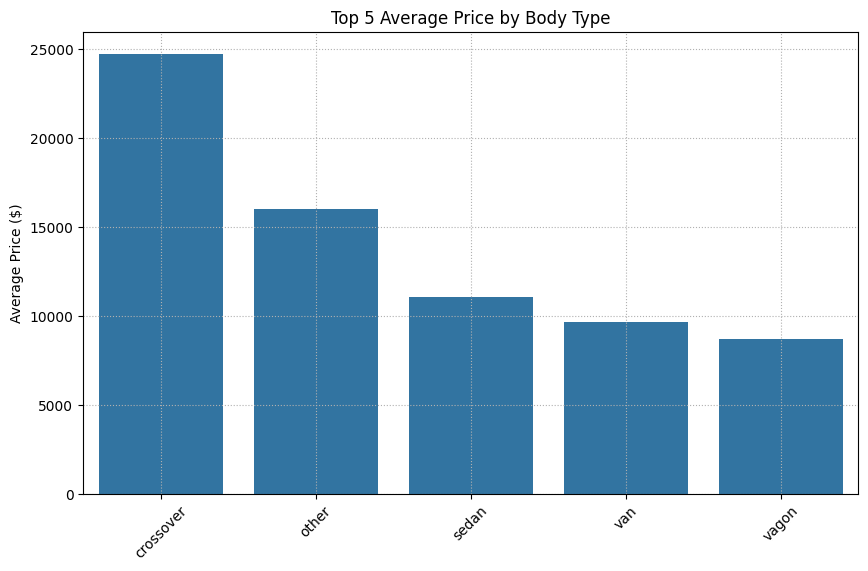

In [ ]:
average_price_by_body = data.groupby('body')['price'].mean().sort_values(ascending=False).reset_index(name='avg_price')
top_5_avg_price_by_body = average_price_by_body.head()

plt.figure(figsize=(10, 6))
sns.barplot(x='body', y='avg_price', data=top_5_avg_price_by_body)
plt.xlabel(None)
plt.ylabel('Average Price ($)')
plt.title('Top 5 Average Price by Body Type')
plt.xticks(rotation=45)
plt.grid(linestyle = ':')
plt.show()

Question 6 : What is the correlation between Price and Age?

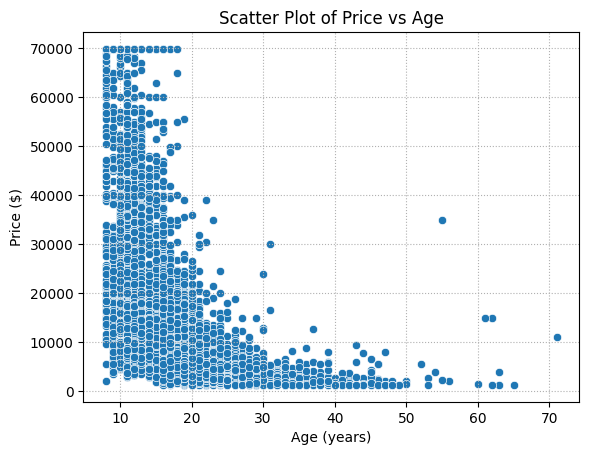

In [ ]:
sns.scatterplot(x="age", y="price", data=data)
plt.xlabel("Age (years)")
plt.ylabel("Price ($)")
plt.title("Scatter Plot of Price vs Age")
plt.grid(linestyle=":")
plt.show()

Above we can clearly see that prices are higher when age is lower

#Analysis Part 2 : Price Prediction

For Price Prediction, we will have to massage the data in the format acceptable by linear regression. Then feed the data into the Regression model and then Evaluate it.

In [ ]:
data.head()

car    price       body  mileage      engV engType registration  \
0           Ford  15500.0  crossover       68  2.500000     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173  1.800000     Gas          yes   
2  Mercedes-Benz  35000.0      other      135  5.500000  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162  1.800000  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91  2.622685   Other          yes   

   year    model  drive  age  reg_num  
0  2010     Kuga   full   14        1  
1  2011  E-Class   rear   13        1  
2  2008   CL 550   rear   16        1  
3  2012    B 180  front   12        1  
4  2013  E-Class  Other   11        1

Since Car ( Car Name ) and Model ( Model Name) are just names we will not consider these in the Price Prediction. However body, engType and drive are although categorical still, these signify the technical properties of the car which will have an impact on the predicted price. So to prepare the data for price prediction, we will remove the columns 'car' and 'model' from our data set.

In [ ]:
model_data=data.copy()
model_data=model_data.drop(['registration','year'], axis=1)
model_data.head()

car    price       body  mileage      engV engType    model  \
0           Ford  15500.0  crossover       68  2.500000     Gas     Kuga   
1  Mercedes-Benz  20500.0      sedan      173  1.800000     Gas  E-Class   
2  Mercedes-Benz  35000.0      other      135  5.500000  Petrol   CL 550   
3  Mercedes-Benz  17800.0        van      162  1.800000  Diesel    B 180   
4  Mercedes-Benz  33000.0      vagon       91  2.622685   Other  E-Class   

   drive  age  reg_num  
0   full   14        1  
1   rear   13        1  
2   rear   16        1  
3  front   12        1  
4  Other   11        1

Since the columns Car and Model have many unique values this will have to be converted into numeric columns. We will use the price column and divide it by 5000 to assign values to both these columns

In [ ]:
model_data['car_bucket'] = None
model_data['model_bucket'] = None

In [ ]:
model_data['car_bucket'] = data['price']/5000
model_data['model_bucket'] = data['price']/5000

In [ ]:
# We will now do one hot encoding for the columns body, engType and Drive
md=pd.get_dummies(model_data, columns= ['body','engType','drive'], dtype= int)

# remove the columns car and model from the model dataframe md
md=md.drop(['car','model'],axis=1)

md.head()

price  mileage      engV  age  reg_num  car_bucket  model_bucket  \
0  15500.0       68  2.500000   14        1        3.10          3.10   
1  20500.0      173  1.800000   13        1        4.10          4.10   
2  35000.0      135  5.500000   16        1        7.00          7.00   
3  17800.0      162  1.800000   12        1        3.56          3.56   
4  33000.0       91  2.622685   11        1        6.60          6.60   

   body_crossover  body_hatch  body_other  ...  body_vagon  body_van  \
0               1           0           0  ...           0         0   
1               0           0           0  ...           0         0   
2               0           0           1  ...           0         0   
3               0           0           0  ...           0         1   
4               0           0           0  ...           1         0   

   engType_Diesel  engType_Gas  engType_Other  engType_Petrol  drive_Other  \
0               0            1              0               0            0   
1               0            1              0               0            0   
2               0            0              0               1            0   
3               1            0              0               0            0   
4               0            0              1               0            1   

   drive_front  drive_full  drive_rear  
0            0           1           0  
1            0           0           1  
2            0           0           1  
3            1           0           0  
4            0           0           0  

[5 rows x 21 columns]

In [ ]:
# We will now Split the Data into x and y for Linear Regression. since Price will be the predicted Variable (y), we will seperate it
md_x=md.drop(['price'],axis=1)
md_y=md['price']


# Now we will use the Train Test Split  method from sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(md_x,md_y, test_size=0.2)

print(f"Train Dataset contains {X_train.shape[0]} rows")
print(f"Test Dataset contains {X_test.shape[0]} rows")


Train Dataset contains 7152 rows
Test Dataset contains 1788 rows


Now we will build our model

In [ ]:
#import the model
from sklearn.linear_model import LinearRegression


In [ ]:
#instantiate
my_linear_reg=LinearRegression(fit_intercept=False)

In [ ]:
#fit
my_linear_reg.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [ ]:
my_linear_reg.coef_

array([ 9.89298849e-15,  7.95807864e-13,  6.08615992e-13, -1.21680838e-11,
        2.50000000e+03,  2.50000000e+03,  3.84838765e-14, -4.87765829e-13,
        1.46002287e-13, -7.29319149e-14,  3.00060855e-13, -5.19657869e-16,
        7.23137422e-13, -5.99274688e-13,  2.08127270e-13, -7.84531855e-13,
       -2.00515346e-13,  6.75015599e-14,  2.07833750e-13, -2.20268248e-13])

In [ ]:
train_predictions=my_linear_reg.predict(X_train)
test_predictions=my_linear_reg.predict(X_test)

In [ ]:
#Now we will evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
rmse_test=(mean_squared_error(y_pred=test_predictions,y_true=y_test,squared=False))
rmse_train=(mean_squared_error(y_pred=train_predictions,y_true=y_train,squared=False))
model_r2= r2_score(y_pred=train_predictions, y_true=y_train)


print("Model Test RMSE" , rmse_test)
print("Model Train RMSE" , rmse_train)
print("Model Test R2", model_r2)

Model Test RMSE 9.471038921255801e-12
Model Train RMSE 9.3516670195763e-12
Model Test R2 1.0


In [ ]:
yhat_test=my_linear_reg.predict(X_test)

In [ ]:
#R2
my_r2 = my_linear_reg.score(X=X_train, y=y_train)
print(f"My Model has R2 of - {my_r2.round(2)}")

My Model has R2 of - 1.0


In [ ]:

from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             mean_absolute_percentage_error)

In [ ]:
mae = mean_absolute_error(y_true=y_test, y_pred=yhat_test)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=yhat_test)
accuracy = 1 - mape

In [ ]:
print(f"Percentage Error for my model is {(mape*100).round(2)}%")
print(f"Accuracy for my model is {(accuracy*100).round(2)}%")

Percentage Error for my model is 0.0%
Accuracy for my model is 100.0%


Now we will predict the Price of a hypothetical car by providing input

In [ ]:
input_car_param=X_test.head(1)
input_car_param.head()

mileage  engV  age  reg_num  car_bucket  model_bucket  body_crossover  \
1608      142   2.0   13        1         2.0           2.0               0   

      body_hatch  body_other  body_sedan  body_vagon  body_van  \
1608           0           0           0           0         1   

      engType_Diesel  engType_Gas  engType_Other  engType_Petrol  drive_Other  \
1608               1            0              0               0            0   

      drive_front  drive_full  drive_rear  
1608            1           0           0

In [ ]:
input_car_dict= { 'mileage' : 25,
'engV' : 20,
'age' : 10,
'reg_num' : 1,
'car_bucket' : 1,
'model_bucket' : 1,
'body_crossover' :0,
'body_hatch' : 1,
'body_other' : 0,
'body_sedan': 0,
'body_vagon' : 0,
'body_van' : 0,
'engType_Diesel' : 0,
'engType_Gas' : 0,
'engType_Other' : 0,
'engType_Petrol' : 1,
'drive_Other' : 1,
'drive_front': 0,
'drive_full' : 1,
'drive_rear' : 0, }


In [ ]:
input_car_param= pd.DataFrame(input_car_dict, index=[0])

In [ ]:
#predict
my_linear_reg.predict(input_car_param)

array([5000.])

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**
Based on the data set we can see that :
1. The Top 5 Cars sold by numbers are Volkswagen, Mercedes, BMW, Toyota and VAZ, however the Top 5 Cars by Average Price are Masserati, Rolls Royce, Lamborghini, Ferrari and Aston Martin
2. The most sold Engine Type is Petrol followed by Diesel, Gas and others
3. By number of car units the most sold Type is Sedan and Crossover, by Average price Crossover tops the Car Type
4. The relation between age and price is inversely propotional, more the age (older the car) lesser the price.


<a name = Section92></a>
### **9.2 Actionable Insights**

1. Give offers which are focussed on Cars which are in good condition but
 less in demand
2. Give special maintenance and service discounts to Cars with Gas Engine
3. Promote selling of the car by an owner at the optimum age so that the
 best price can be drawn for that car, because while the age of the car increases, the price relatively decreases
4. Princing from the above model is directional as there haev been some assumptions like, flattening the extremely high and low cars, grouping the non popular values to a section called Others
5. For high sales and turnover, more handovers are required at the earliest times, hence  focus more on cars with age less than 5 years to facilitate the best pricing




Opportunities for Further Analysis
Used cars may also be categorized as Vintage, the conditions which we will consider to label a car as vintage would be
1. Age>30 years
2. Specific Brands
3. Mileage >0
4. Registration = Yes
5. We will add a 10% premium over the predicted price because its a vintage car
6. We will not remove the Vintage cars from the Dataset, to observe the predicted price

One of the measures which was missing in the dataset is Total Car Run i.e. how many miles the car has covered so far, because this has an impact on the engine and chassis of the car

Another measure which could have been added is the number of minor and major accidents the car has been through which may also have an impact in the pricing